In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [38]:
merged_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Walmart Time Series /dataset/merged_data.csv")
merged_data

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False,B,118221


##Holiday Effect on Sales


In [39]:
merged_data['PreHoliday'] = merged_data['IsHoliday_x'].shift(-1).fillna(False)
merged_data['PostHoliday'] = merged_data['IsHoliday_x'].shift(1).fillna(False)


<ipython-input-39-0c96237e9cf4>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data['PreHoliday'] = merged_data['IsHoliday_x'].shift(-1).fillna(False)
<ipython-input-39-0c96237e9cf4>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data['PostHoliday'] = merged_data['IsHoliday_x'].shift(1).fillna(False)


##Transformation of non-normal distrivutions

In [40]:

#Fuel_price
merged_data['Fuel_Price_sqrt'] = np.sqrt(merged_data['Fuel_Price'])

#CPI
merged_data['CPI_standardized'] = (merged_data['CPI'] - merged_data['CPI'].mean()) / merged_data['CPI'].std()

#Temperature
merged_data['Temperature_standardized'] = (merged_data['Temperature'] - merged_data['Temperature'].mean()) / merged_data['Temperature'].std()

#Unemploymnet
merged_data['Unemployment_standardized'] = (merged_data['Unemployment'] - merged_data['Unemployment'].mean()) / merged_data['Unemployment'].std()

#Size
merged_data['Size_log'] = np.log1p(merged_data['Size'])

merged_data

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,IsHoliday_y,Type,Size,PreHoliday,PostHoliday,Fuel_Price_sqrt,CPI_standardized,Temperature_standardized,Unemployment_standardized,Size_log
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,False,A,151315,True,False,1.603746,1.018773,-0.963797,0.078201,11.927126
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,...,True,A,151315,False,False,1.596246,1.022497,-1.169782,0.078201,11.927126
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,...,False,A,151315,False,True,1.585560,1.023696,-1.092809,0.078201,11.927126
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,...,False,A,151315,False,False,1.600312,1.024475,-0.729624,0.078201,11.927126
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,...,False,A,151315,False,False,1.620185,1.025254,-0.736671,0.078201,11.927126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,...,False,B,118221,False,False,1.999250,0.531461,0.259647,0.388404,11.680319
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,...,False,B,118221,False,False,1.996246,0.535466,0.260189,0.379280,11.680319
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,...,False,B,118221,False,False,2.000000,0.539472,-0.304644,0.379280,11.680319
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,...,False,B,118221,False,False,1.992235,0.539563,-0.196231,0.379280,11.680319


In [41]:
# Ensure Date column is in datetime format
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Set Date as the index
merged_data.set_index('Date', inplace=True)

merged_data['DayOfWeek'] = merged_data.index.dayofweek
merged_data['WeekOfYear'] = merged_data.index.isocalendar().week
merged_data['Month'] = merged_data.index.month
merged_data['Quarter'] = merged_data.index.quarter


In [42]:
merged_data

,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,PostHoliday,Fuel_Price_sqrt,CPI_standardized,Temperature_standardized,Unemployment_standardized,Size_log,DayOfWeek,WeekOfYear,Month,Quarter
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,...,False,1.603746,1.018773,-0.963797,0.078201,11.927126,4,5,2,1
2010-02-12,1,1,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,...,False,1.596246,1.022497,-1.169782,0.078201,11.927126,4,6,2,1
2010-02-19,1,1,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,...,True,1.585560,1.023696,-1.092809,0.078201,11.927126,4,7,2,1
2010-02-26,1,1,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,...,False,1.600312,1.024475,-0.729624,0.078201,11.927126,4,8,2,1
2010-03-05,1,1,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,...,False,1.620185,1.025254,-0.736671,0.078201,11.927126,4,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,45,98,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,...,False,1.999250,0.531461,0.259647,0.388404,11.680319,4,39,9,3
2012-10-05,45,98,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,...,False,1.996246,0.535466,0.260189,0.379280,11.680319,4,40,10,4
2012-10-12,45,98,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,...,False,2.000000,0.539472,-0.304644,0.379280,11.680319,4,41,10,4


## Lag Features

In [43]:
merged_data['Lag_1_Week'] = merged_data['Weekly_Sales'].shift(1)
merged_data['Lag_4_Weeks'] = merged_data['Weekly_Sales'].shift(4)
merged_data['Lag_12_Weeks'] = merged_data['Weekly_Sales'].shift(12)


In [44]:
merged_data['Rolling_4_Week_Avg'] = merged_data['Weekly_Sales'].rolling(window=4).mean()
merged_data['Rolling_12_Week_Avg'] = merged_data['Weekly_Sales'].rolling(window=12).mean()


In [56]:
mean_values = merged_data[['Lag_1_Week', 'Lag_4_Weeks', 'Lag_12_Weeks', 'Rolling_4_Week_Avg', 'Rolling_12_Week_Avg']].mean()
merged_data[['Lag_1_Week', 'Lag_4_Weeks', 'Lag_12_Weeks', 'Rolling_4_Week_Avg', 'Rolling_12_Week_Avg']] = \
    merged_data[['Lag_1_Week', 'Lag_4_Weeks', 'Lag_12_Weeks', 'Rolling_4_Week_Avg', 'Rolling_12_Week_Avg']].fillna(mean_values)


In [58]:
merged_data.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size',
       'PreHoliday', 'PostHoliday', 'Fuel_Price_sqrt', 'CPI_standardized',
       'Temperature_standardized', 'Unemployment_standardized', 'Size_log',
       'DayOfWeek', 'WeekOfYear', 'Month', 'Quarter', 'Lag_1_Week',
       'Lag_4_Weeks', 'Lag_12_Weeks', 'Rolling_4_Week_Avg',
       'Rolling_12_Week_Avg'],
      dtype='object')

## Need to get back here if model is not performing good.

In [60]:
# Dropping MarkDown columns
merged_data.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], inplace=True)


In [62]:
merged_data['Normalized_Size'] = (merged_data['Size'] - merged_data['Size'].mean()) / merged_data['Size'].std()


In [63]:
merged_data = pd.get_dummies(merged_data, columns=['Type'], drop_first=True)


In [ ]:
merged_data['Weeks_Since_Holiday'] = (~merged_data['IsHoliday_x']).cumsum() - (~merged_data['IsHoliday_x']).cumsum().where(merged_data['IsHoliday_x']).ffill().fillna(0)


In [64]:
merged_data['Weeks_Since_Holiday'] = (~merged_data['IsHoliday_x']).cumsum() - (~merged_data['IsHoliday_x']).cumsum().where(merged_data['IsHoliday_x']).ffill().fillna(0)


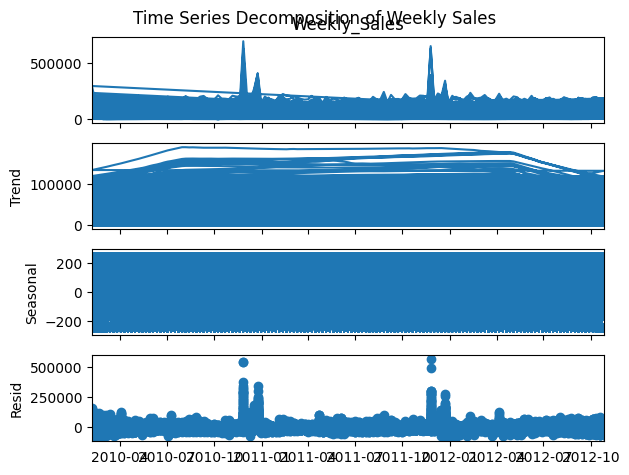

In [68]:
# Perform the decomposition on 'Weekly_Sales' (you can adjust the period as necessary, e.g., weekly data might use 52 for annual seasonality)
decomposition = seasonal_decompose(merged_data['Weekly_Sales'], model='additive', period=52)

# Plot the decomposition
decomposition.plot()
plt.suptitle("Time Series Decomposition of Weekly Sales")
plt.show()

# Add decomposition components to the DataFrame
merged_data['Trend_Component'] = decomposition.trend
merged_data['Seasonal_Component'] = decomposition.seasonal
merged_data['Residual_Component'] = decomposition.resid

In [71]:
# Interpolate missing values
merged_data['Trend_Component'].interpolate(method='linear', inplace=True)
merged_data['Seasonal_Component'].interpolate(method='linear', inplace=True)
merged_data['Residual_Component'].interpolate(method='linear', inplace=True)


<ipython-input-71-63af1c1a776e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Trend_Component'].interpolate(method='linear', inplace=True)
<ipython-input-71-63af1c1a776e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [73]:
# Fill NaNs with the mean value of each component
merged_data['Trend_Component'].fillna(merged_data['Trend_Component'].mean(), inplace=True)
merged_data['Seasonal_Component'].fillna(merged_data['Seasonal_Component'].mean(), inplace=True)
merged_data['Residual_Component'].fillna(merged_data['Residual_Component'].mean(), inplace=True)


<ipython-input-73-f0383c879bea>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Trend_Component'].fillna(merged_data['Trend_Component'].mean(), inplace=True)
<ipython-input-73-f0383c879bea>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

In [83]:
merged_data.head()

,Store,Dept,Weekly_Sales,IsHoliday_x,Fuel_Price,IsHoliday_y,PreHoliday,PostHoliday,CPI_standardized,Temperature_standardized,...,Lag_1_Week,Lag_4_Weeks,Lag_12_Weeks,Rolling_4_Week_Avg,Normalized_Size,Type_B,Type_C,Weeks_Since_Holiday,Seasonal_Component,Residual_Component
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,2.572,False,True,False,1.018773,-0.963797,...,15981.293478,15981.401397,15981.695373,15981.24479,0.239209,False,False,1.0,-41.759036,0.032957
2010-02-12,1,1,46039.49,True,2.548,True,False,False,1.022497,-1.169782,...,24924.500000,15981.401397,15981.695373,15981.24479,0.239209,False,False,0.0,202.193662,0.032957
2010-02-19,1,1,41595.55,False,2.514,False,False,True,1.023696,-1.092809,...,46039.490000,15981.401397,15981.695373,15981.24479,0.239209,False,False,1.0,55.607930,0.032957
2010-02-26,1,1,19403.54,False,2.561,False,False,False,1.024475,-0.729624,...,41595.550000,15981.401397,15981.695373,32990.77000,0.239209,False,False,2.0,-188.693604,0.032957
2010-03-05,1,1,21827.90,False,2.625,False,False,False,1.025254,-0.736671,...,19403.540000,24924.500000,15981.695373,32216.62000,0.239209,False,False,3.0,-108.815672,0.032957


In [74]:
merged_data.isnull().sum()

,0
Store,0
Dept,0
Weekly_Sales,0
IsHoliday_x,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0
IsHoliday_y,0
Size,0


In [75]:
merged_data.head()

,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y,Size,...,Lag_12_Weeks,Rolling_4_Week_Avg,Rolling_12_Week_Avg,Normalized_Size,Type_B,Type_C,Weeks_Since_Holiday,Trend_Component,Seasonal_Component,Residual_Component
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,42.31,2.572,211.096358,8.106,False,151315,...,15981.695373,15981.24479,15981.263705,0.239209,False,False,1.0,15980.808356,-41.759036,0.032957
2010-02-12,1,1,46039.49,True,38.51,2.548,211.242170,8.106,True,151315,...,15981.695373,15981.24479,15981.263705,0.239209,False,False,0.0,15980.808356,202.193662,0.032957
2010-02-19,1,1,41595.55,False,39.93,2.514,211.289143,8.106,False,151315,...,15981.695373,15981.24479,15981.263705,0.239209,False,False,1.0,15980.808356,55.607930,0.032957
2010-02-26,1,1,19403.54,False,46.63,2.561,211.319643,8.106,False,151315,...,15981.695373,32990.77000,15981.263705,0.239209,False,False,2.0,15980.808356,-188.693604,0.032957
2010-03-05,1,1,21827.90,False,46.50,2.625,211.350143,8.106,False,151315,...,15981.695373,32216.62000,15981.263705,0.239209,False,False,3.0,15980.808356,-108.815672,0.032957


In [76]:
merged_data.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday_y', 'Size',
       'PreHoliday', 'PostHoliday', 'Fuel_Price_sqrt', 'CPI_standardized',
       'Temperature_standardized', 'Unemployment_standardized', 'Size_log',
       'DayOfWeek', 'WeekOfYear', 'Month', 'Quarter', 'Lag_1_Week',
       'Lag_4_Weeks', 'Lag_12_Weeks', 'Rolling_4_Week_Avg',
       'Rolling_12_Week_Avg', 'Normalized_Size', 'Type_B', 'Type_C',
       'Weeks_Since_Holiday', 'Trend_Component', 'Seasonal_Component',
       'Residual_Component'],
      dtype='object')

In [80]:
# Drop redundant features to reduce multicollinearity
merged_data.drop(columns=['Fuel_Price_sqrt', 'Size_log', 'Rolling_12_Week_Avg', 'Trend_Component'], inplace=True)


In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select numeric columns for VIF check
numeric_cols = merged_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate VIF for each numeric feature
vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_cols
vif_data['VIF'] = [variance_inflation_factor(merged_data[numeric_cols].values, i)
                   for i in range(len(numeric_cols))]

print(vif_data)


                      Feature         VIF
0                       Store    4.386867
1                        Dept    3.125622
2                Weekly_Sales   55.148176
3                  Fuel_Price    8.017911
4            CPI_standardized    1.192100
5    Temperature_standardized    1.773555
6   Unemployment_standardized    1.193458
7                  Lag_1_Week   38.210869
8                 Lag_4_Weeks   17.837039
9                Lag_12_Weeks   10.600104
10         Rolling_4_Week_Avg  112.358307
11            Normalized_Size    1.118109
12        Weeks_Since_Holiday    4.002296
13         Seasonal_Component    1.000566
14         Residual_Component    2.872161


In [86]:
from sklearn.preprocessing import MinMaxScaler

# Define features to normalize
features_to_normalize = [
    'Weekly_Sales', 'Fuel_Price', 'Lag_1_Week', 'Lag_4_Weeks',
    'Lag_12_Weeks', 'Rolling_4_Week_Avg', 'Weeks_Since_Holiday','Seasonal_Component', 'Residual_Component'
]

# Initialize the scaler
scaler = MinMaxScaler()

# Apply scaler and add back to the dataframe
merged_data[features_to_normalize] = scaler.fit_transform(merged_data[features_to_normalize])


In [93]:
merged_data

,Store,Dept,Weekly_Sales,IsHoliday_x,Fuel_Price,IsHoliday_y,PreHoliday,PostHoliday,CPI_standardized,Temperature_standardized,...,Lag_1_Week,Lag_4_Weeks,Lag_12_Weeks,Rolling_4_Week_Avg,Normalized_Size,Type_B,Type_C,Weeks_Since_Holiday,Seasonal_Component,Residual_Component
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,0.042851,0,0.050100,0,1,0,1.018773,-0.963797,...,0.030040,0.030040,0.030040,0.049846,0.239209,False,False,0.015873,0.425080,0.126605
2010-02-12,1,1,0.073097,1,0.038076,1,0,0,1.022497,-1.169782,...,0.042851,0.030040,0.030040,0.049846,0.239209,False,False,0.000000,0.875189,0.126605
2010-02-19,1,1,0.066732,0,0.021042,0,0,1,1.023696,-1.092809,...,0.073097,0.030040,0.030040,0.049846,0.239209,False,False,0.015873,0.604729,0.126605
2010-02-26,1,1,0.034942,0,0.044589,0,0,0,1.024475,-0.729624,...,0.066732,0.030040,0.030040,0.099806,0.239209,False,False,0.031746,0.153977,0.126605
2010-03-05,1,1,0.038415,0,0.076653,0,0,0,1.025254,-0.736671,...,0.034942,0.042851,0.030040,0.097532,0.239209,False,False,0.047619,0.301357,0.126605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,45,98,0.007875,0,0.764028,0,0,0,0.531461,0.259647,...,0.007816,0.007642,0.008092,0.004327,-0.303489,True,False,0.047619,0.875189,0.126445
2012-10-05,45,98,0.008046,0,0.758016,0,0,0,0.535466,0.260189,...,0.007875,0.007651,0.008142,0.004529,-0.303489,True,False,0.063492,0.604729,0.126445
2012-10-12,45,98,0.008666,0,0.765531,0,0,0,0.539472,-0.304644,...,0.008046,0.008015,0.008357,0.004863,-0.303489,True,False,0.079365,0.153977,0.126445


In [91]:
# Convert boolean columns to integers
bool_columns = ['IsHoliday_x', 'IsHoliday_y', 'PreHoliday', 'PostHoliday']
merged_data[bool_columns] = merged_data[bool_columns].astype(int)


In [92]:
merged_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Walmart Time Series /dataset/merged_data_after_FE.csv', index=False)